# Assignment 1
In this assignment, you are given a dataset of mall customers. You are aksed to use basic statistics and visulation methods to understnad your customers and form different customer segments

Complete the given tasks below. (Notice each of the missing code to be filled is <span class="alert-warning">a single line command</span>,more than one command line will be downgraded)


<h1 style="color:purple">Author</h1>

  
- Name: Chen Hejian                      
- Student ID: 21153331

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Load data
data_path = 'https://drive.google.com/uc?export=download&id=1gx9tW38wE4GDLr_Lp2aZ7UTVNwtqvbze'
mall = pd.read_csv(data_path)

# Part I: Understand the code

- The manager wants to have a general picture of customers annual income
- So she firstly check the median of the income, its distribution.
- Also, the age range of those with high income group

In [48]:
# check the median income
income_median = mall['Annual Income'].median()

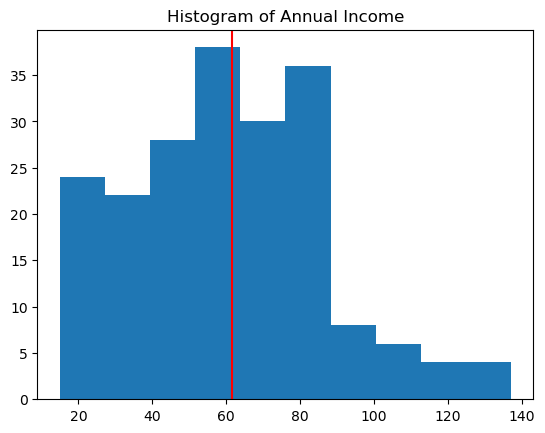

In [49]:
# histogram of annual income with the reference line of the median income
plt.hist(mall['Annual Income'])
plt.title('Histogram of Annual Income')
plt.axvline(income_median,color='red') #reference line of the median income
plt.show()

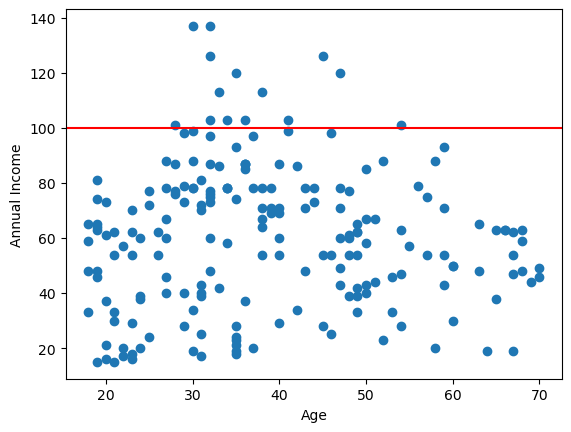

In [50]:
#Scatter plot between age and annual income
#The manager wants to see the age range of those with high annual income (more than 100) customers
plt.scatter(mall['Age'],mall['Annual Income'])
plt.axhline(100,color='red')#reference line for the cutoff
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

In [51]:
# Min and max age of these specific group of ccustomers
mall[mall['Annual Income']>100].Age.min(), mall[mall['Annual Income']>100].Age.max()

(28, 54)

# Part II

### Task 1:Missing value check 
- There are missing values in spending score, check how many are there. [5pts]

In [52]:
mall['Spending Score'].isnull().sum()

5

### Task 2:Fill in the missing value
- Fill in the missing value in spending score by its column mean [5pts]
- confirm there is no missing value afterward [5pts]
   - Remark: you need to turn on the setting of 'inplace' in 'fillna()'; otherwise the NAs are still there

In [64]:
# Fill in mising value
mall['Spending Score'].fillna(mall['Spending Score'].mean(), inplace=True)

C:\Users\20232\AppData\Local\Temp\ipykernel_44660\732533315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mall['Spending Score'].fillna(mall['Spending Score'].mean(), inplace=True)


In [65]:
# NA check 
mall['Spending Score'].isnull().sum() == 0

True

### Task 3: Compute the cutoff of spending score
- The manager wants to see the top 5% customers in spending score. (Hints: recall the usage of percentile or quantile)
- Calculate the cutoff to classify the top 5% customers in spending score [5pts]

In [55]:
score_cutoff = mall['Spending Score'].quantile(0.95)
score_cutoff

92.0

### Task 4: Draw a histogram and the reference line of the cutoff 
- Draw the histogram of spending score [5pts]
- Also the reference line of the cutoff [5pts]

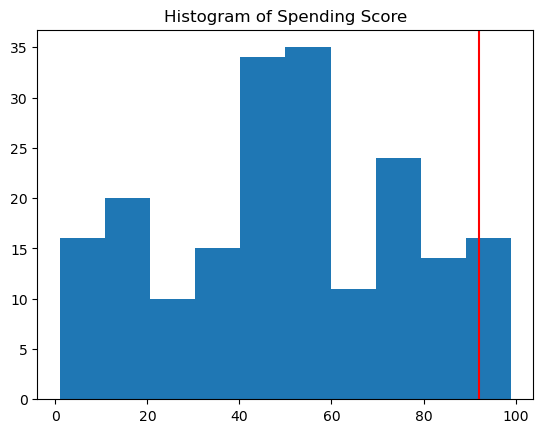

In [56]:
plt.hist(mall['Spending Score']) #Histogram
plt.title('Histogram of Spending Score')
plt.axvline(score_cutoff,color='red') #reference line
plt.show()

### Task 5: Customer Segmentation by 4 strainght lines
- Generate a scatter plot for Spending Score (x-axis) and Annual Income (y-axis) [5pts]
- There are 5 obvioss segments, draw 2 verticlal lines and 2 horizontal lines to partition the segments [20pts]

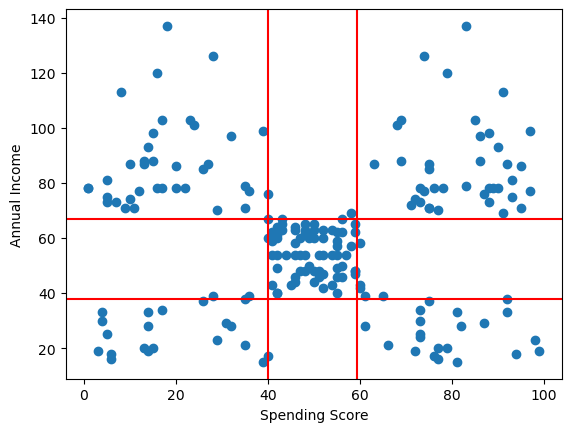

In [57]:
plt.scatter(mall['Spending Score'],mall['Annual Income']) #scatter plot
plt.axhline(mall['Annual Income'].quantile(0.6), color='red')#line1
plt.axhline(mall['Annual Income'].quantile(0.2),color='red')#line2
plt.axvline(mall['Spending Score'].quantile(2/3),color='red')#line3
plt.axvline(mall['Spending Score'].quantile(0.3),color='red')#line4
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()

### Task 6: According to the segments, there are 2 segments are high spending customers but with different income range. 
- Count the number of customers in each of these 2 segments [10pts]

In [58]:
# counting for segment 1
mall.loc[mall['Spending Score']>mall['Spending Score'].quantile(2/3)].loc[mall['Annual Income']>mall['Annual Income'].quantile(0.6)].shape[0]

39

In [59]:
# counting for segment 2
mall.loc[mall['Spending Score']>mall['Spending Score'].quantile(2/3)].loc[mall['Annual Income']<mall['Annual Income'].quantile(0.3)].shape[0]

25

### Task 7: For the segment with high spending score and high annual income.
- check the mean age of these customers [5pts]

In [60]:
# mean age
mall.loc[mall['Spending Score']>mall['Spending Score'].quantile(2/3)].loc[mall['Annual Income']>mall['Annual Income'].quantile(0.6)]['Age'].mean()

32.69230769230769